<a href="https://colab.research.google.com/github/monalisapatra26/ML4Science/blob/main/Deep%20Learning/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape = IMAGE_SHAPE+(3,))])

In [ ]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

Loading Our flower Datset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/15054751430_5af76f6096_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3466923719_b4b6df7f8b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3514340206_efb8198a80_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/5979111199_495884b578_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9482209981_bf7bf6022b_m.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/4243078361_7b92a932cd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410421672_563550467c.jpg')]

In [ ]:
import PIL

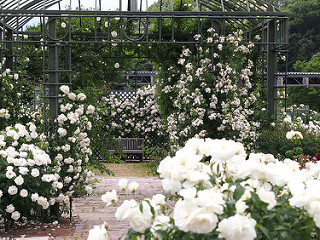

In [ ]:
PIL.Image.open(str(roses[3]))

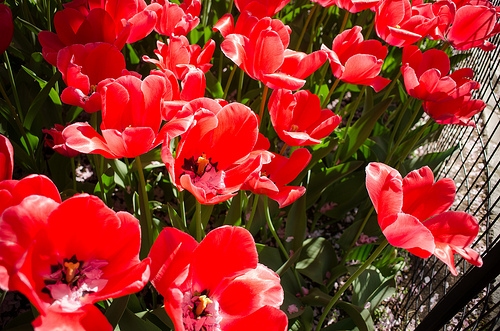

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2788276815_8f730bd942.jpg'),
 PosixPath('datasets/flower_photos/roses/4243078361_7b92a932cd_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14312910041_b747240d56_n.jpg'),
 PosixPath('datasets/flower_photos/roses/410421672_563550467c.jpg')]

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/12045735155_42547ce4e9_n.jpg'

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][10]))

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
for flower_name, images in flowers_images_dict.items():
     print(flower_name)
     print(len(images))

roses
641
daisy
633
dandelion
898
sunflowers
699
tulips
799


In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [ ]:
##Use Data Augmentation to improve Test Accuracy

img_height = 180
img_width = 180

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                    input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
#Train the model using data augmentation and a drop out layer
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 121s 1s/step - loss: 1.3322 - accuracy: 0.4375
Epoch 2/30
86/86 [==============================] - 123s 1s/step - loss: 1.0271 - accuracy: 0.5963
Epoch 3/30
86/86 [==============================] - 110s 1s/step - loss: 0.9051 - accuracy: 0.6515
Epoch 4/30
86/86 [==============================] - 107s 1s/step - loss: 0.8498 - accuracy: 0.6846
Epoch 5/30
86/86 [==============================] - 112s 1s/step - loss: 0.7839 - accuracy: 0.6984
Epoch 6/30
86/86 [==============================] - 109s 1s/step - loss: 0.7439 - accuracy: 0.7137
Epoch 7/30
86/86 [==============================] - 108s 1s/step - loss: 0.7103 - accuracy: 0.7369
Epoch 8/30
86/86 [==============================] - 108s 1s/step - loss: 0.6664 - accuracy: 0.7376
Epoch 9/30
86/86 [==============================] - 109s 1s/step - loss: 0.6450 - accuracy: 0.7504
Epoch 10/30
86/86 [==============================] - 108s 1s/step - loss: 0.6168 - accuracy: 0.7664
Epoch 11/

In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 9s 313ms/step - loss: 0.9384 - accuracy: 0.7658


[0.9384288787841797, 0.7657952308654785]

## We next use the concept of transfer learning, to see how the training happens

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [ ]:
X = np.array(X)
y = np.array(y)

Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing Scale Images

In [ ]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make prediction using pre-trained model on new flowers dataset

In [ ]:
X[10].shape

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[100], IMAGE_SHAPE)
x1_resized = cv2.resize(X[150], IMAGE_SHAPE)
x2_resized = cv2.resize(X[200], IMAGE_SHAPE)

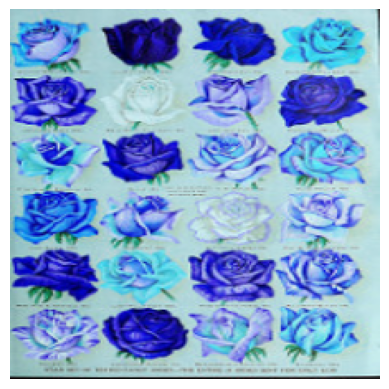

In [ ]:
plt.axis('off')
plt.imshow(X[100])

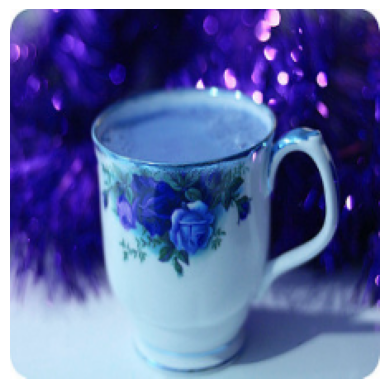

In [ ]:
plt.axis('off')
plt.imshow(X[150])

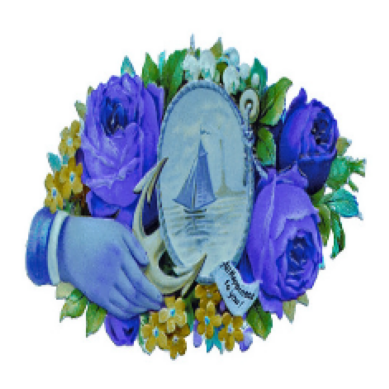

In [ ]:
plt.axis('off')
plt.imshow(X[200])

In [ ]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 638ms/step


array([795, 722, 722])

Now take pre-trained model and retrain it using flowers images

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_2 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 88s 960ms/step - loss: 0.7780 - acc: 0.7144
Epoch 2/5
86/86 [==============================] - 82s 950ms/step - loss: 0.4176 - acc: 0.8554
Epoch 3/5
86/86 [==============================] - 83s 965ms/step - loss: 0.3283 - acc: 0.8957
Epoch 4/5
86/86 [==============================] - 86s 1000ms/step - loss: 0.2731 - acc: 0.9164
Epoch 5/5
86/86 [==============================] - 84s 982ms/step - loss: 0.2310 - acc: 0.9353


In [ ]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 28s 936ms/step - loss: 0.3566 - acc: 0.8813


[0.3565889894962311, 0.8812636137008667]

In [ ]:
predicted = model.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 543ms/step


array([1, 1, 1])

In [ ]:
flowers_labels_dict

{'roses': 0, 'daisy': 1, 'dandelion': 2, 'sunflowers': 3, 'tulips': 4}